In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import os

import h5py as h5

In [2]:
# Sod shocktube test.
gamma = 1.4

basedir_mfm = '/home/nina/Downloads/scp_transfers/output_shocktube_emass/'
basedir_mfv = '/home/nina/Downloads/scp_transfers/output_shocktube_diffmass/'

# exact solution at t = 5.0 s.
exact_sol = '/home/nina/Downloads/scp_transfers/shocktube_exact.txt'

x_e   = np.loadtxt(exact_sol, usecols=0, dtype=float)
rho_e = np.loadtxt(exact_sol, usecols=1, dtype=float)
p_e   = np.loadtxt(exact_sol, usecols=2, dtype=float)
ent_e = np.loadtxt(exact_sol, usecols=3, dtype=float)

e_e = (1.0 / (gamma - 1.0)) * np.divide(p_e, rho_e)

v_e   = np.loadtxt(exact_sol, usecols=4, dtype=float)

In [3]:
# Check header data.
i = 10

fname = os.path.join(basedir_mfm, 'snapshot_{0:03d}.hdf5'.format(i))

f = h5.File(fname, 'r')

header = f['Header']
data   = f['PartType0']

for key in header.attrs.keys():
    val = header.attrs[key]
    print('{0:s}:\t{1}'.format(key, val))

BoxSize:	80.0
ComovingIntegrationOn:	0
Effective_Kernel_NeighborNumber:	4.0
Fixed_ForceSoftening_Keplerian_Kernel_Extent:	[2.8 0.  0.  0.  0.  0. ]
Flag_Cooling:	0
Flag_DoublePrecision:	1
Flag_Feedback:	0
Flag_IC_Info:	0
Flag_Metals:	0
Flag_Sfr:	0
Flag_StellarAge:	0
GIZMO_version:	2022
Gravitational_Constant_In_Code_Inits:	6.672e-08
HubbleParam:	1.0
Kernel_Function_ID:	3
MassTable:	[0. 0. 0. 0. 0. 0.]
Maximum_Mass_For_Cell_Split:	0.47031249999999997
Minimum_Mass_For_Cell_Merge:	0.0765625
NumFilesPerSnapshot:	1
NumPart_ThisFile:	[320   0   0   0   0   0]
NumPart_Total:	[320   0   0   0   0   0]
NumPart_Total_HighWord:	[0 0 0 0 0 0]
Redshift:	0.0
Time:	5.0
UnitLength_In_CGS:	1.0
UnitMass_In_CGS:	1.0
UnitVelocity_In_CGS:	1.0


In [4]:
def get_snapshot_data(basedir, i):
    
    fname = os.path.join(basedir, 'snapshot_{0:03d}.hdf5'.format(i))
    
    f = h5.File(fname, 'r')
    
    header = f['Header']
    data   = f['PartType0']
    
    t = header.attrs['Time']

    x_vals = data['Coordinates'][:, 0]
    rho_vals = data['Density'][:]
    e_vals = data['InternalEnergy'][:]
    v_vals = data['Velocities'][:, 0]
    
    return t, x_vals, rho_vals, e_vals, v_vals

# Plot solution.
def make_plots(x, v, rho, p, en, x0, v0, rho0, p0, en0, t):
    
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    axs[0, 0].scatter(x, rho, color='r', s=7.0)
    axs[0, 1].scatter(x, v, color='g', s=7.0)
    axs[1, 0].scatter(x, p, color='b', s=7.0)
    axs[1, 1].scatter(x, en, color='k', s=7.0)
    
    axs[0, 0].plot(x0, rho0, linewidth=1.5, linestyle='--', color='gray')
    axs[0, 1].plot(x0, v0, linewidth=1.5, linestyle='--', color='gray')
    axs[1, 0].plot(x0, p0, linewidth=1.5, linestyle='--', color='gray')
    axs[1, 1].plot(x0, en0, linewidth=1.5, linestyle='--',color='gray')
    
    axs[0, 0].set_xlabel(r'$x$', fontsize='x-large')
    axs[0, 0].set_ylabel(r'$\rho$', fontsize='x-large')
    axs[0, 0].set_title('density', fontsize='xx-large')
    
    axs[0, 0].annotate('MFV', xy=(0.8, 0.92), fontsize='xx-large')
    axs[0, 0].annotate('t = {0:.2f} s'.format(t), xy=(0.8, 0.85), fontsize='xx-large')
    
    axs[0, 1].set_xlabel(r'$x$', fontsize='x-large')
    axs[0, 1].set_ylabel(r'$v$', fontsize='x-large')
    axs[0, 1].set_title('velocity', fontsize='xx-large')
    
    axs[1, 0].set_xlabel(r'$x$', fontsize='x-large')
    axs[1, 0].set_ylabel(r'$P$', fontsize='x-large')
    axs[1, 0].set_title('pressure', fontsize='xx-large')
    
    axs[1, 1].set_xlabel(r'$x$', fontsize='x-large')
    axs[1, 1].set_ylabel(r'$e$', fontsize='x-large')
    axs[1, 1].set_title('specific energy', fontsize='xx-large')
    
    plt.tight_layout()
    plt.show()
    #plt.savefig(fname)
    
    return

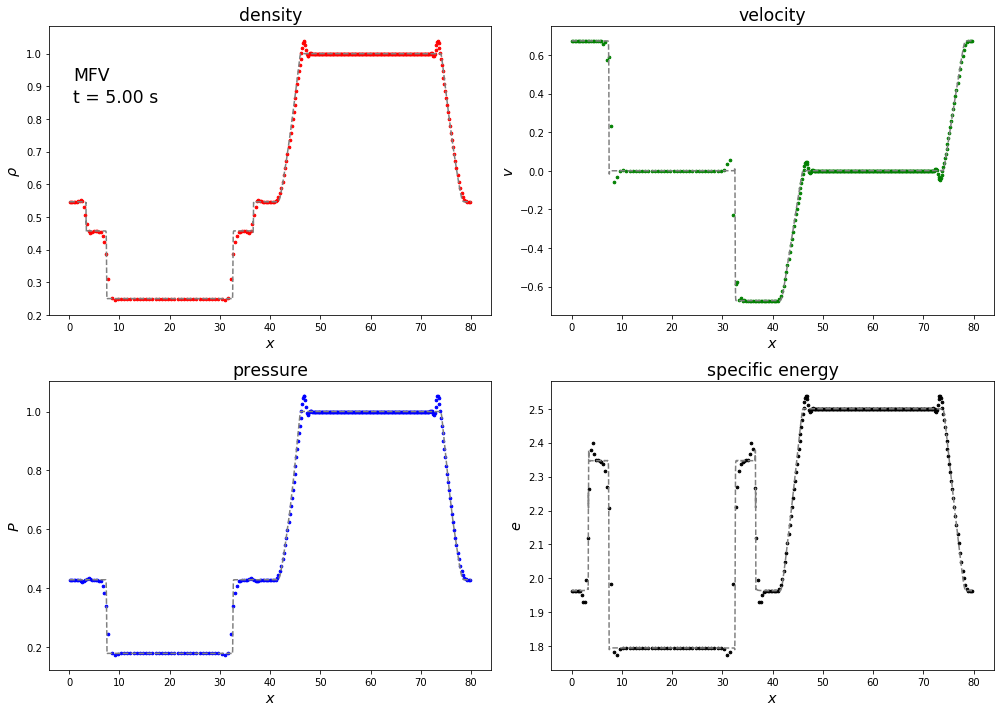

In [5]:
t_mfm, x_vals_mfm, rho_vals_mfm, e_vals_mfm, v_vals_mfm = get_snapshot_data(basedir_mfm, i)
t_mfv, x_vals_mfv, rho_vals_mfv, e_vals_mfv, v_vals_mfv = get_snapshot_data(basedir_mfv, i)

p_vals_mfm = (gamma - 1.0) * np.multiply(e_vals_mfm, rho_vals_mfm)
p_vals_mfv = (gamma - 1.0) * np.multiply(e_vals_mfv, rho_vals_mfv)

make_plots(x_vals_mfm, v_vals_mfm, rho_vals_mfm, p_vals_mfm, e_vals_mfm, x_e, v_e, rho_e, p_e, e_e, t_mfm)

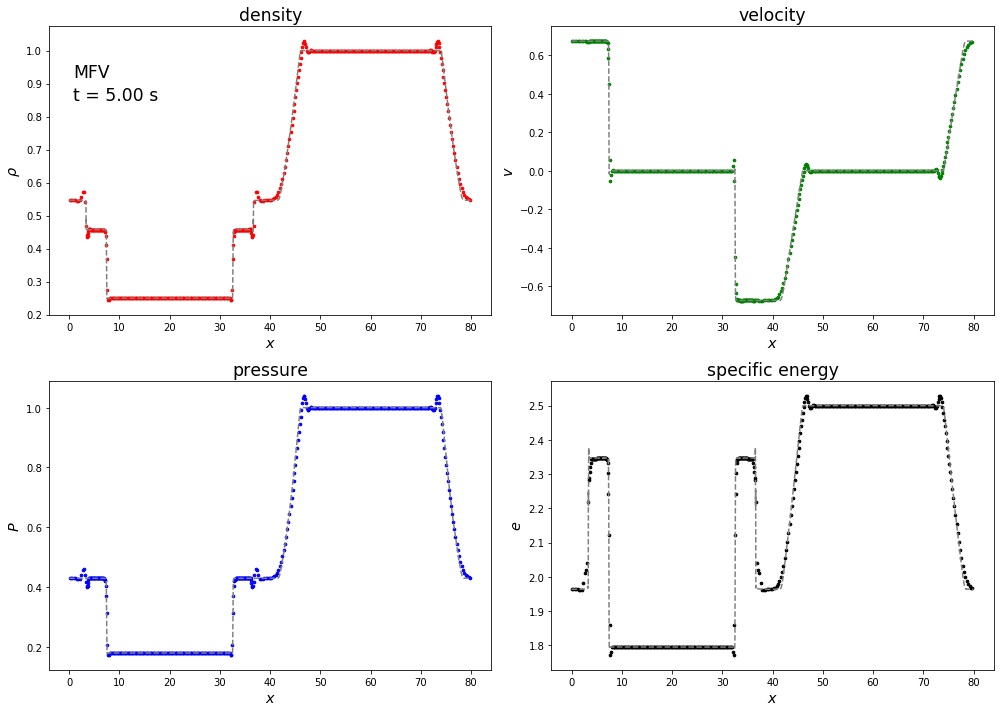

In [6]:
make_plots(x_vals_mfv, v_vals_mfv, rho_vals_mfv, p_vals_mfv, e_vals_mfv, x_e, v_e, rho_e, p_e, e_e, t_mfv)

Shock front is more broad with MFM - resolution is higher at shock front with MFV.

In [7]:
# MHD test: Toth shocktube.
basedir_toth = '/home/nina/Downloads/scp_transfers/output_toth/'

In [8]:
def get_snapshot_data(basedir, i):
    
    fname = os.path.join(basedir, 'snapshot_{0:03d}.hdf5'.format(i))
    
    f = h5.File(fname, 'r')
    
    header = f['Header']
    data   = f['PartType0']
    
    t = header.attrs['Time']

    x = data['Coordinates'][:, 0]
    y = data['Coordinates'][:, 1]
    z = data['Coordinates'][:, 2]
    
    u = data['Velocities'][:, 0]
    v = data['Velocities'][:, 1]
    w = data['Velocities'][:, 2]
    
    B_x = data['MagneticField'][:, 0]
    B_y = data['MagneticField'][:, 1]
    B_z = data['MagneticField'][:, 2]
    
    rho = data['Density'][:]
    e   = data['InternalEnergy'][:]
    
    
    return t, x, y, z, u, v, w, B_x, B_y, B_z, rho, e

In [9]:
t, x, y, z, u, v, w, B_x, B_y, B_z, rho, e = get_snapshot_data(basedir_toth, 2)

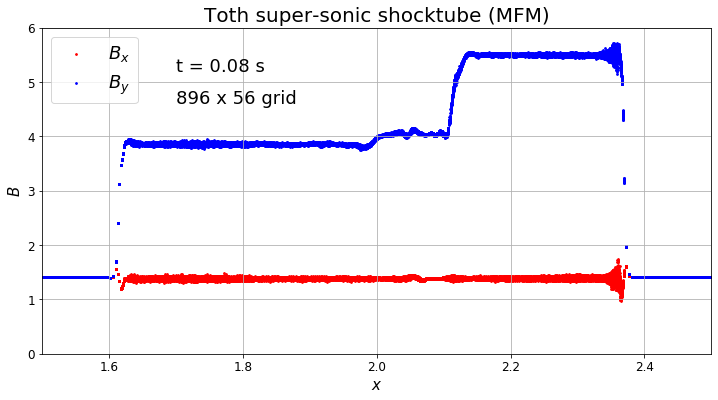

In [10]:
mpl.rcParams['xtick.labelsize'] = 12.0
mpl.rcParams['ytick.labelsize'] = 12.0

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.scatter(x, B_x, color='r', s=3.0, label=r'$B_x$')
ax.scatter(x, B_y, color='b', s=3.0, label=r'$B_y$')

ax.set_xlabel(r'$x$', fontsize=15.0)
ax.set_ylabel(r'$B$', fontsize=15.0)

ax.set_xlim(xmin=1.5, xmax=2.5)
ax.set_ylim(ymin=0.0, ymax=6.0)

ax.set_title('Toth super-sonic shocktube (MFM)', fontsize=20.0)

ax.annotate('t = {0:.2f} s'.format(t), xy=(1.7, 5.2), fontsize=18.0)
ax.annotate('896 x 56 grid'.format(t), xy=(1.7, 4.6), fontsize=18.0)

plt.legend(fontsize=18.0)
plt.grid(True)
plt.show()